TASK 7 - Support Vector Machines

STEP 1 - Load and prepare a dataset for binary classification

In [6]:
#importing libraries for support vector machines
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [7]:
bcancer = pd.read_csv('breast-cancer.csv')

bcancer['diagnosis'] = bcancer['diagnosis'].map({'M': 1, 'B': 0}) #convert diagnosis to numerical values

bcancer.drop(['id'], axis=1, inplace=True) #drop unnecessary columns

# features and labels
X = bcancer.drop('diagnosis', axis=1)
y = bcancer['diagnosis']

#Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [8]:
bcancer.head()  # Display the first few rows of the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


STEP 2 - Training svm with linear nd RBF kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

#RBF SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

#evaluate
print("Linear SVM accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear SVM accuracy: 0.9649122807017544
RBF SVM accuracy: 0.9736842105263158


STEP 3 - Visualizing decision boundaries using 2d features

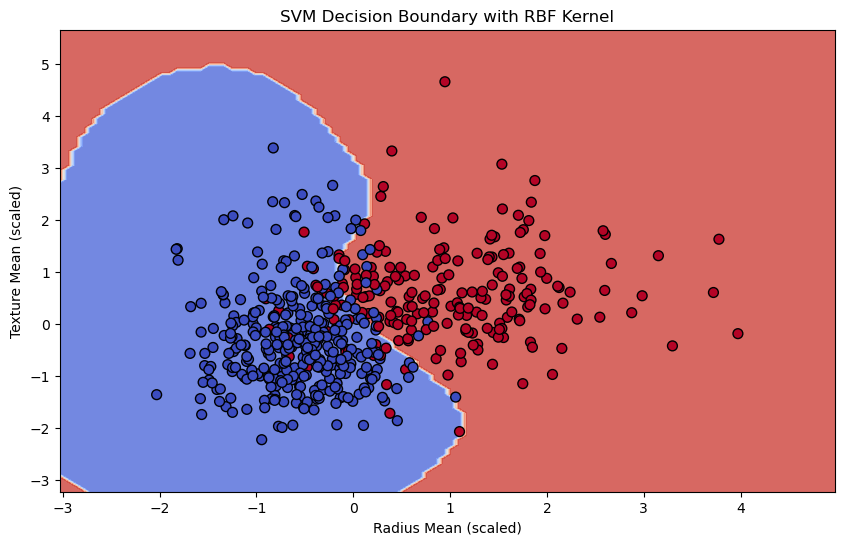

In [10]:
X_vis = bcancer[['radius_mean','texture_mean']].values
y_vis = bcancer['diagnosis'].values
X_vis_scaled = StandardScaler().fit_transform(X_vis)

#train on 2D
model_2d = SVC(kernel='rbf', C=1.0, gamma='auto')
model_2d.fit(X_vis_scaled, y_vis)

#creating meshgrid for visualization
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary with RBF Kernel')
plt.xlabel('Radius Mean (scaled)')
plt.ylabel('Texture Mean (scaled)')
plt.show()


STEP 4 - Hyperparameter Tuning (C and Gamma)

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'C': 100, 'gamma': 0.01}
Best cross-validation score:  0.9758241758241759


STEP 5 - Cross-Validation Evaluation

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 #cross-validation for linear SVM
linear_cv_scores = cross_val_score(SVC(kernel='linear'), X_train, y_train, cv=cv, scoring='accuracy')
print("Linear SVM cross-validation scores:", linear_cv_scores)
#cross-validation for RBF SVM
rbf_cv_scores = cross_val_score(SVC(kernel='rbf'), X_train, y_train, cv=cv, scoring='accuracy')
print("RBF SVM cross-validation scores:", rbf_cv_scores)

Linear SVM cross-validation scores: [0.94505495 0.97802198 0.96703297 0.96703297 0.96703297]
RBF SVM cross-validation scores: [0.96703297 0.97802198 0.96703297 0.96703297 0.97802198]
